# **Project Name**    - Yes Bank Stock Closing Price Prediction



**Import Required Libraries**

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [64]:
df=pd.read_csv("YesBank_StockPrices.csv")

In [65]:
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [66]:
df.shape

(185, 5)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


**Missing Values/Null Values**

In [68]:
df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

**Duplicate Values**

In [69]:
len(df[df.duplicated()])

0

In [70]:
df.describe(include='all')

,Date,Open,High,Low,Close
count,185,185.000000,185.000000,185.000000,185.000000
unique,185,NaN,NaN,NaN,NaN
top,Nov-20,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,105.541405,116.104324,94.947838,105.204703
std,NaN,98.879850,106.333497,91.219415,98.583153
min,NaN,10.000000,11.240000,5.550000,9.980000
25%,NaN,33.800000,36.140000,28.510000,33.450000
50%,NaN,62.980000,72.550000,58.000000,62.540000
75%,NaN,153.000000,169.190000,138.350000,153.300000


In [71]:
# Ensuring the date column is properly parsed by appending a default day (01)
df['Date'] = pd.to_datetime(df['Date'], format='%b-%y').dt.strftime('%Y-%m') + '-01'
df['Date'] = pd.to_datetime(df['Date'])

In [72]:
# Extracting year and month from the Date column
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

In [73]:
# Droping the original Date column
df = df.drop(columns=['Date'])

# Handling missing values (if any)
df = df.fillna(df.median())

In [74]:
df

,Open,High,Low,Close,Year,Month
0,13.00,14.00,11.25,12.46,2005,7
1,12.58,14.88,12.55,13.42,2005,8
2,13.48,14.87,12.27,13.30,2005,9
3,13.20,14.47,12.40,12.99,2005,10
4,13.35,13.88,12.88,13.41,2005,11
...,...,...,...,...,...,...
180,25.60,28.30,11.10,11.95,2020,7
181,12.00,17.16,11.85,14.37,2020,8
182,14.30,15.34,12.75,13.15,2020,9
183,13.30,14.01,12.11,12.42,2020,10


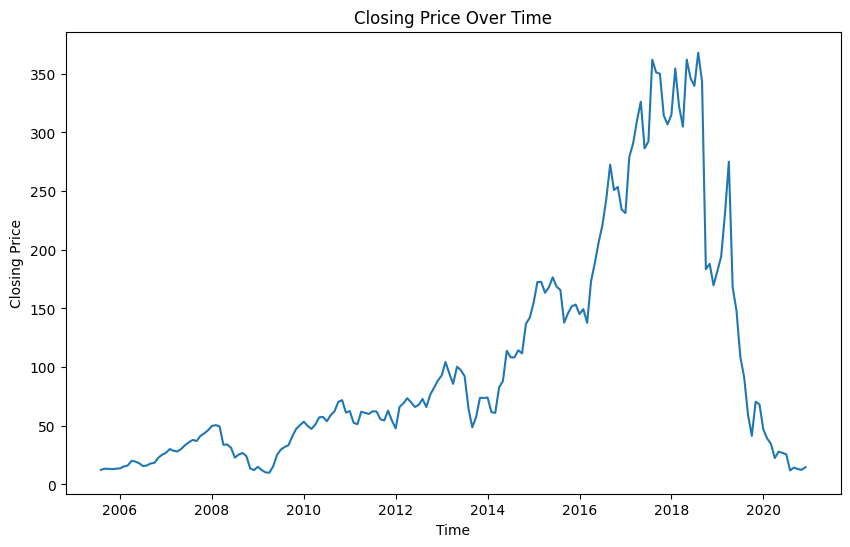

In [75]:
# Visualize the data
plt.figure(figsize=(10, 6))
plt.plot(df['Year'] + df['Month']/12, df['Close'])
plt.title('Closing Price Over Time')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.show()

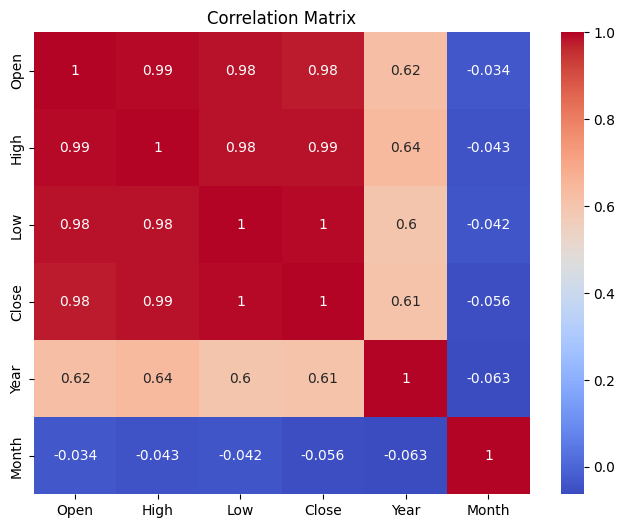

In [76]:
# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [77]:
# Define features and target variable
X = df[['Open', 'High', 'Low', 'Year', 'Month']]
y = df['Close']


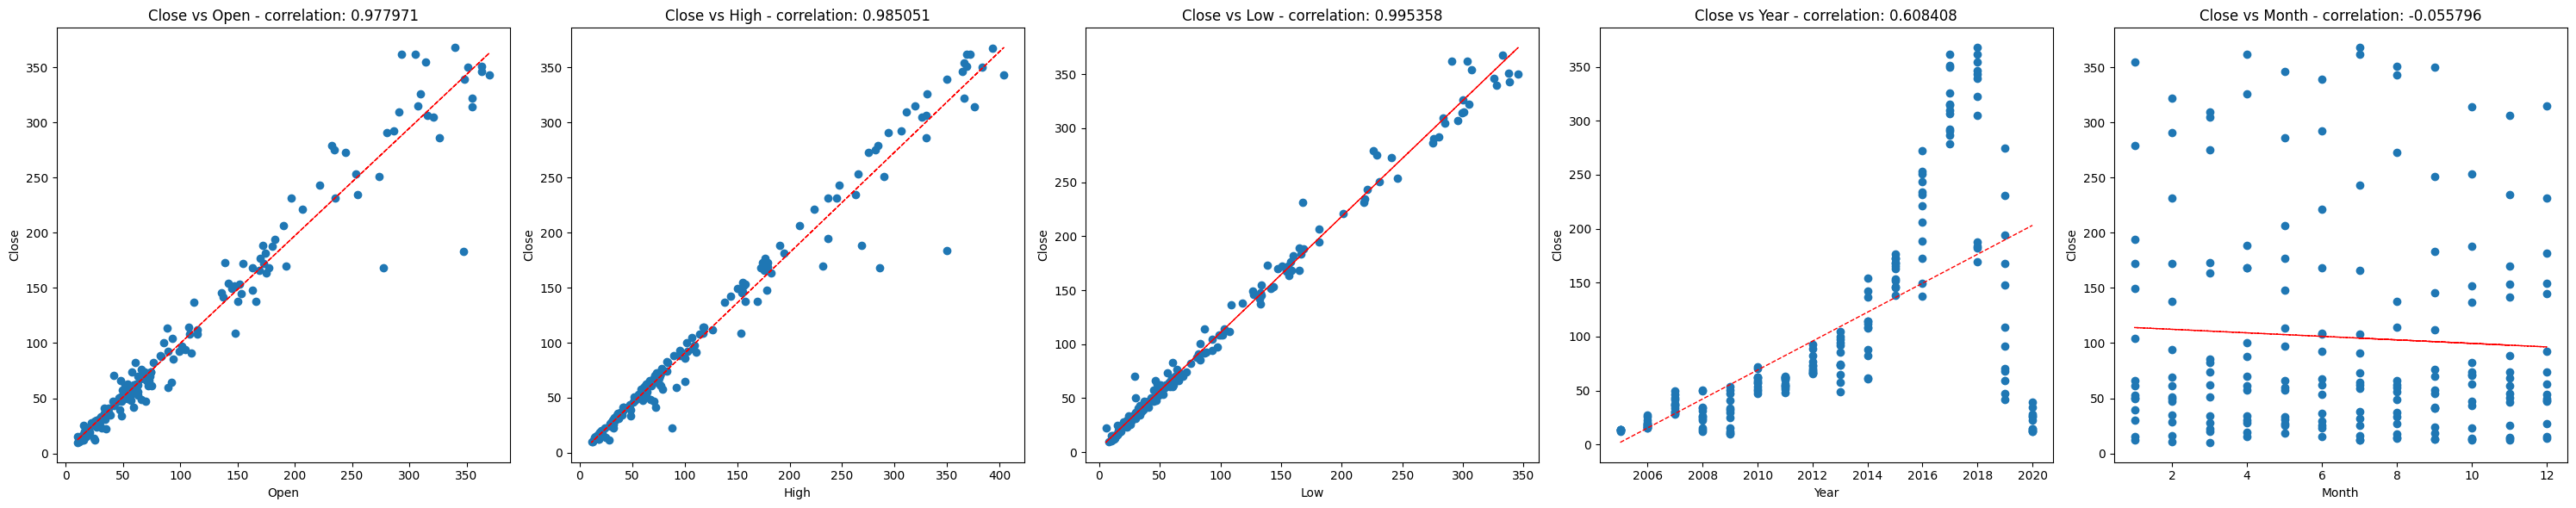

In [78]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming df is your DataFrame and X is your feature DataFrame
num_cols = len(X.columns)
fig, axes = plt.subplots(nrows=1, ncols=num_cols, figsize=(6 * num_cols, 6))  # Create a 1xN grid of subplots

# Loop through each column in the features
for i, col in enumerate(X.columns):
    ax = axes[i]
    feature = df[col]
    label = df['Close']
    correlation = feature.corr(label)  # Calculate the correlation between dependent and independent variables

    ax.scatter(x=feature, y=label)  # Plot dependent variables against independent features
    ax.set_xlabel(col)
    ax.set_ylabel('Close')
    ax.set_title(f'Close vs {col} - correlation: {round(correlation, 6)}')

    # Fit a linear trend line
    z = np.polyfit(df[col], df['Close'], 1)
    y_ = np.poly1d(z)(df[col])
    ax.plot(df[col], y_, "r--", lw=1)

plt.tight_layout()
plt.show()


In [79]:
# Split the df into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

**Linear Regression**

In [80]:
# Initialize and train the model
lr = LinearRegression()
lr.fit(xtrain, ytrain)
# Make predictions
ytrain_pred_lr = lr.predict(xtrain)
ytest_pred_lr = lr.predict(xtest)

In [81]:
# Calculate metrics for training data
r2_train = r2_score(ytrain, ytrain_pred_lr)
adj_r2_train = 1 - (1 - r2_train) * ((len(ytrain) - 1) / (len(ytrain) - xtrain.shape[1] - 1))
mae_train = mean_absolute_error(ytrain, ytrain_pred_lr)
mse_train = mean_squared_error(ytrain, ytrain_pred_lr)
rmse_train = np.sqrt(mse_train)
# Calculate metrics for testing data
r2_test = r2_score(ytest, ytest_pred_lr)
adj_r2_test = 1 - (1 - r2_test) * ((len(ytest) - 1) / (len(ytest) - xtest.shape[1] - 1))
mae_test = mean_absolute_error(ytest, ytest_pred_lr)
mse_test = mean_squared_error(ytest, ytest_pred_lr)
rmse_test = np.sqrt(mse_test)
# Print the performance metrics
print("Training data R2 and Adjusted R2 Score")
print("-----------------------------------------")
print(f"R2 score {r2_train}")
print(f"Adjusted R2 score {adj_r2_train}")
print()
print("Testing data R2 and Adjusted R2 Score")
print("-----------------------------------------")
print(f"R2 score {r2_test}")
print(f"Adjusted R2 score {adj_r2_test}")
print()
print("The performance metrics")
print("-----------------------------------------")
print(f"MAE {mae_test}")
print(f"MSE {mse_test}")
print(f"RMSE {rmse_test}")

Training data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.9961698783160551
Adjusted R2 score 0.9960350148764796

Testing data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.9907046745006218
Adjusted R2 score 0.9892054284523351

The performance metrics
-----------------------------------------
MAE 5.896270669836199
MSE 84.01889739942469
RMSE 9.166182269594287


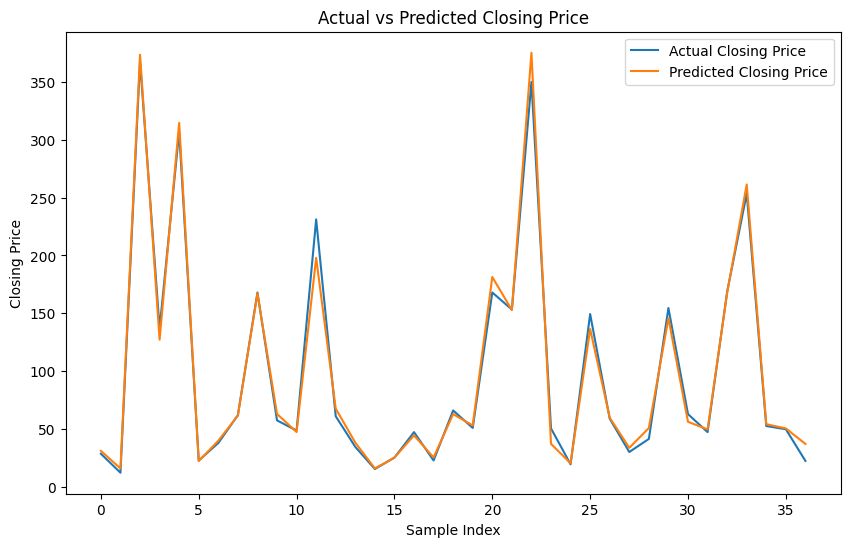

In [82]:
# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.plot(ytest.values, label='Actual Closing Price')
plt.plot(ytest_pred, label='Predicted Closing Price')
plt.title('Actual vs Predicted Closing Price')
plt.xlabel('Sample Index')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

In [83]:
# Transform Your data
X= np.log10(X)
# Create the dependent variable data
y = np.log10(y)

In [84]:
# Split the df into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

**Random Forest Regression**

In [85]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(xtrain,ytrain)
ytrain_pred_rf = rf.predict(xtrain)
ytest_pred_rf = rf.predict(xtest)

In [86]:
# Calculate metrics for training data
r2_train = r2_score(ytrain, ytrain_pred_rf)
adj_r2_train = 1 - (1 - r2_train) * ((len(ytrain) - 1) / (len(ytrain) - xtrain.shape[1] - 1))
mae_train = mean_absolute_error(ytrain, ytrain_pred_rf)
mse_train = mean_squared_error(ytrain, ytrain_pred_rf)
rmse_train = np.sqrt(mse_train)
# Calculate metrics for testing data
r2_test = r2_score(ytest, ytest_pred_rf)
adj_r2_test = 1 - (1 - r2_test) * ((len(ytest) - 1) / (len(ytest) - xtest.shape[1] - 1))
mae_test = mean_absolute_error(ytest, ytest_pred_rf)
mse_test = mean_squared_error(ytest, ytest_pred_rf)
rmse_test = np.sqrt(mse_test)
# Print the performance metrics
print("Training data R2 and Adjusted R2 Score")
print("-----------------------------------------")
print(f"R2 score {r2_train}")
print(f"Adjusted R2 score {adj_r2_train}")
print()
print("Testing data R2 and Adjusted R2 Score")
print("-----------------------------------------")
print(f"R2 score {r2_test}")
print(f"Adjusted R2 score {adj_r2_test}")
print()
print("The performance metrics")
print("-----------------------------------------")
print(f"MAE {mae_test}")
print(f"MSE {mse_test}")
print(f"RMSE {rmse_test}")

Training data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.9983779921595067
Adjusted R2 score 0.9983208792073767

Testing data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.9625063409523912
Adjusted R2 score 0.9564589765898737

The performance metrics
-----------------------------------------
MAE 0.04653799388782823
MSE 0.005806061879944204
RMSE 0.0761975188568775


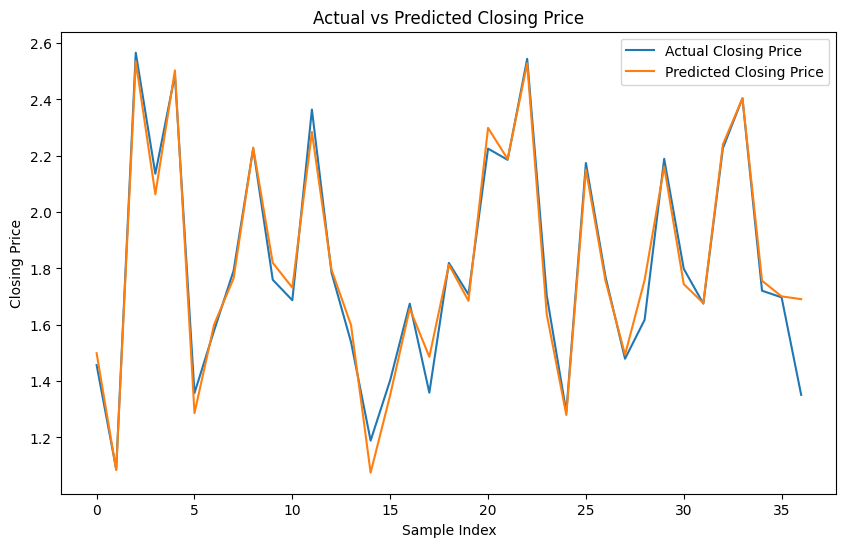

In [87]:
# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.plot(ytest.values, label='Actual Closing Price')
plt.plot(ytest_pred_rf, label='Predicted Closing Price')
plt.title('Actual vs Predicted Closing Price')
plt.xlabel('Sample Index')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

**Support Vector Regression**

In [88]:
svr = SVR()
svr.fit(xtrain,ytrain)
# Prediction on the model
ytrain_pred_svr =svr.predict(xtrain)
ytest_pred_svr =svr.predict(xtest)

In [89]:
# Calculate metrics for training data
r2_train = r2_score(ytrain, ytrain_pred_svr)
adj_r2_train = 1 - (1 - r2_train) * ((len(ytrain) - 1) / (len(ytrain) - xtrain.shape[1] - 1))
mae_train = mean_absolute_error(ytrain, ytrain_pred_svr)
mse_train = mean_squared_error(ytrain, ytrain_pred_svr)
rmse_train = np.sqrt(mse_train)
# Calculate metrics for testing data
r2_test = r2_score(ytest, ytest_pred_svr)
adj_r2_test = 1 - (1 - r2_test) * ((len(ytest) - 1) / (len(ytest) - xtest.shape[1] - 1))
mae_test = mean_absolute_error(ytest, ytest_pred_svr)
mse_test = mean_squared_error(ytest, ytest_pred_svr)
rmse_test = np.sqrt(mse_test)
# Print the performance metrics
print("Training data R2 and Adjusted R2 Score")
print("-----------------------------------------")
print(f"R2 score {r2_train}")
print(f"Adjusted R2 score {adj_r2_train}")
print()
print("Testing data R2 and Adjusted R2 Score")
print("-----------------------------------------")
print(f"R2 score {r2_test}")
print(f"Adjusted R2 score {adj_r2_test}")
print()
print("The performance metrics")
print("-----------------------------------------")
print(f"MAE {mae_test}")
print(f"MSE {mse_test}")
print(f"RMSE {rmse_test}")

Training data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.9837171910485039
Adjusted R2 score 0.9831438527051413

Testing data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.9794998642530335
Adjusted R2 score 0.9761933907454582

The performance metrics
-----------------------------------------
MAE 0.04470864692601394
MSE 0.0031745383010766625
RMSE 0.05634304128352198


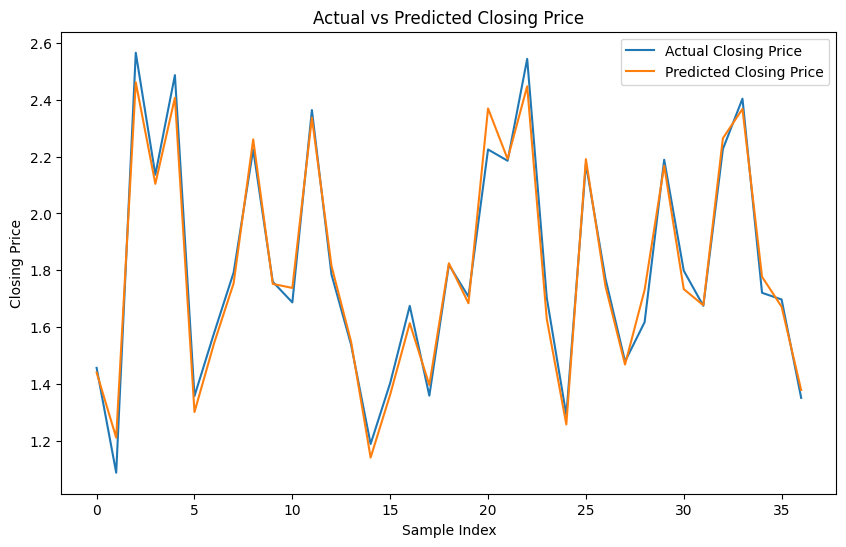

In [90]:
# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.plot(ytest.values, label='Actual Closing Price')
plt.plot(ytest_pred_svr, label='Predicted Closing Price')
plt.title('Actual vs Predicted Closing Price')
plt.xlabel('Sample Index')
plt.ylabel('Closing Price')
plt.legend()
plt.show()